In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
import imageio

from model_training import *


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


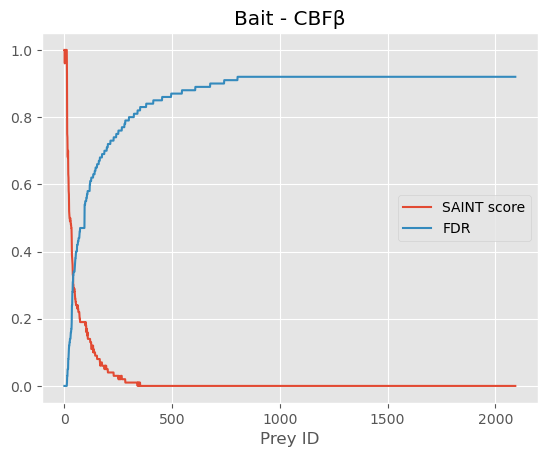

In [2]:
plot_saint_fdr(cb, title=title)
# Look at the distribution of adjacency matices As

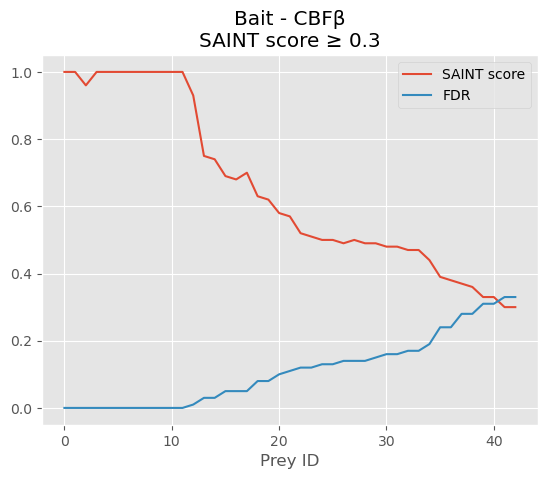

In [3]:
plot_saint_fdr(cb_train, title=title2)

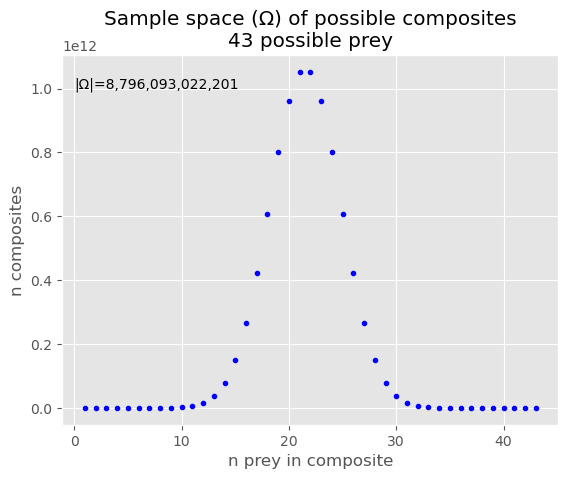

In [4]:
mp.plot_sample_space(Ss, textx=0, texty=1e12)

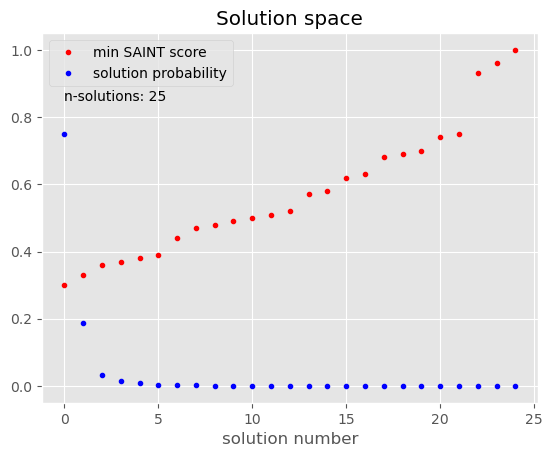

In [5]:
mp.plot_solution_space(Ss)

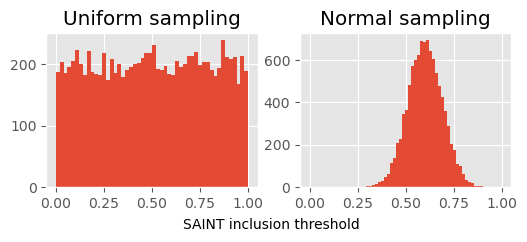

In [6]:
mp.plot_samples(Ss)

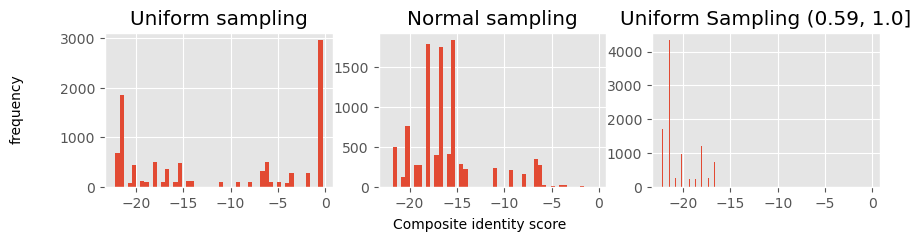

In [7]:
mp.plot_triple_samples(Ss)

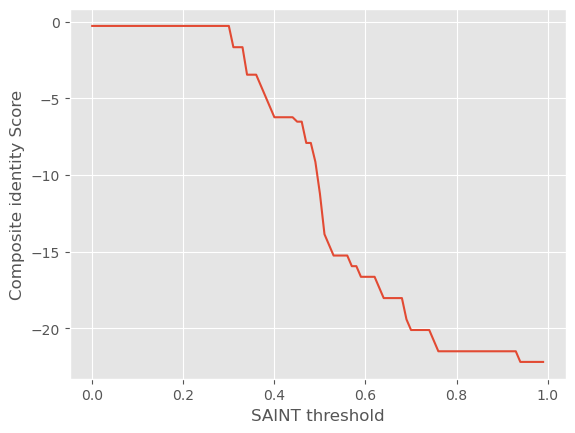

In [8]:
mp.plot_score_saint(Ss)

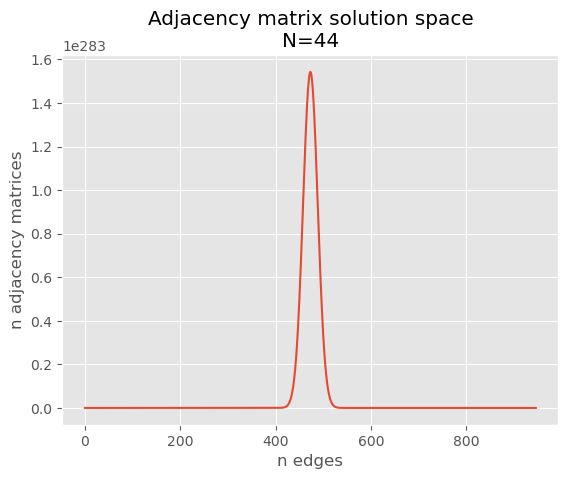

In [9]:
# Now what about enumerating Adjacency matrices?

_ = mp.plot_As_solution_space(44)

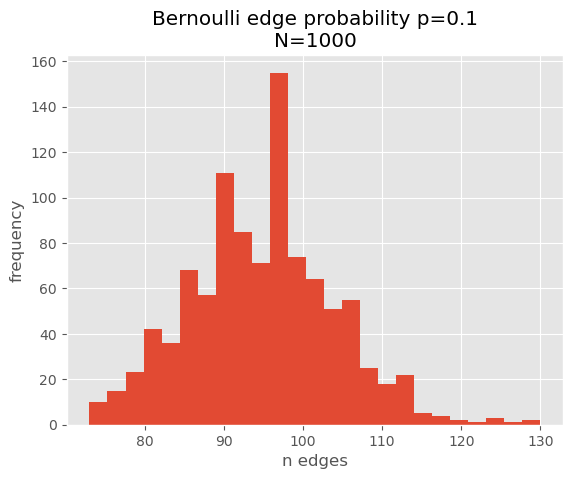

In [10]:
plot_edge_density(rseed=13, p=p, n_examples=n_examples)

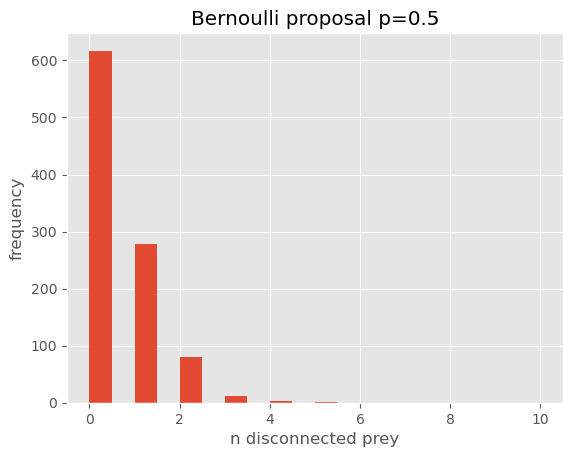

In [11]:
plot_disconnectivity(rseed=13, p=p, n_examples=n_examples)

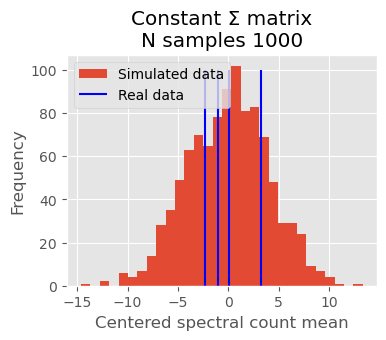

In [12]:
# Selecting the Wishart priors
# 
#V = get_scale_matrix_V(cb_train, scatter_diag_scaler=0.1)
#z = mp._move_Sigma_inv(key, V, 43, 43)

# Prior predictive distribtuion for this scatter matrix

mover_training = MoverTraining(rseed=13, cb_train=cb_train, nsamples=1000, style='ggplot')    
mover_training.plot_mean_sim()

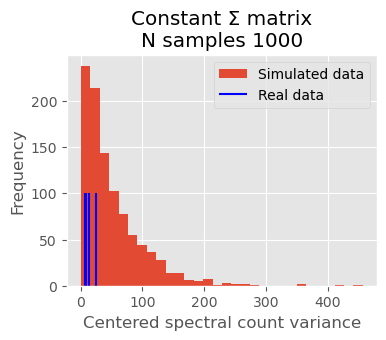

In [13]:
mover_training.plot_var_sim()

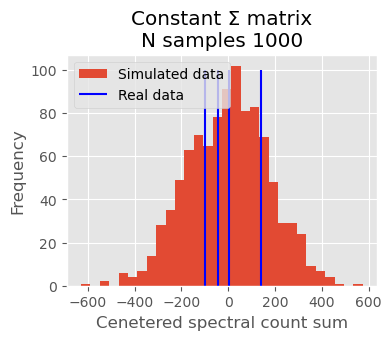

In [14]:
mover_training.plot_sum_sim()

In [15]:
# Conclusion - the choice of the scatter matrix is reasonable

# Do an Experiment where we sample Covaraiance matrices and then sample data

m43, v43, ss43 = do_sampled_sigma_experiment(1000, 43, 13)
m50, v50, ss50 = do_sampled_sigma_experiment(1000, 50, 13)

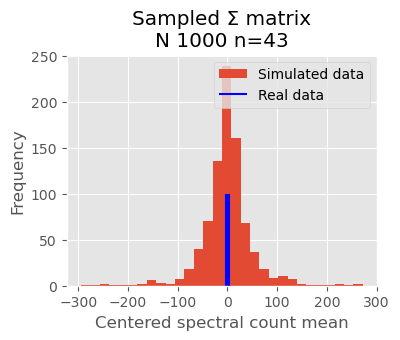

In [16]:
t0 = u'Sampled \u03A3 matrix' + f'\nN {nsamples} n='
mover_training.mean_plot(np.array(m43), title=t0 + '43')

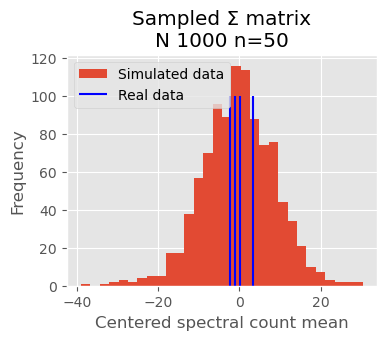

In [17]:
mover_training.mean_plot(np.array(m50), title=t0 + '50')

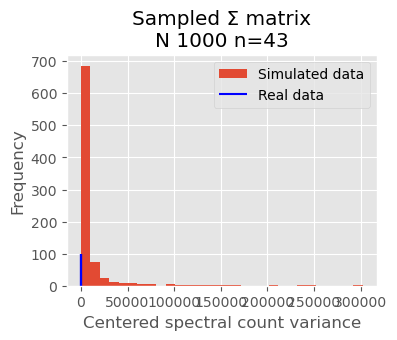

In [18]:
tv = u'Sampled \u03A3 matrix' + f'\nN {nsamples} n='
mover_training.var_plot(v43,title=tv + '43')

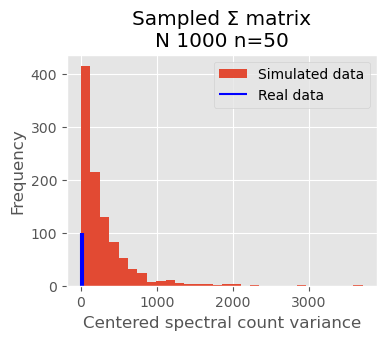

In [19]:
mover_training.var_plot(v50, title=tv + '50')

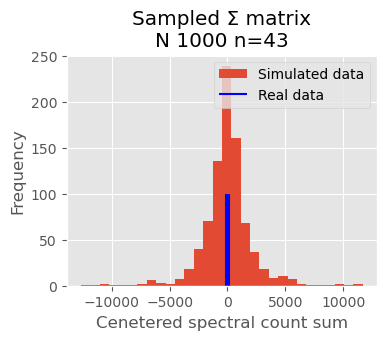

In [20]:
ts = u'Sampled \u03A3 matrix' + f'\nN {nsamples} n='
mover_training.sum_plot(np.array(ss43), title=ts + '43')

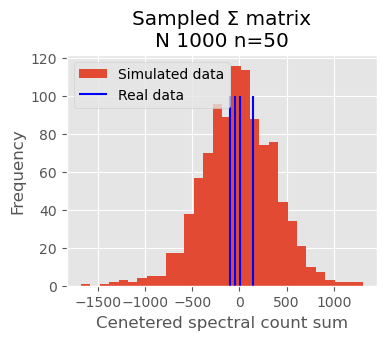

In [21]:
mover_training.sum_plot(np.array(ss50), title=ts + '50')

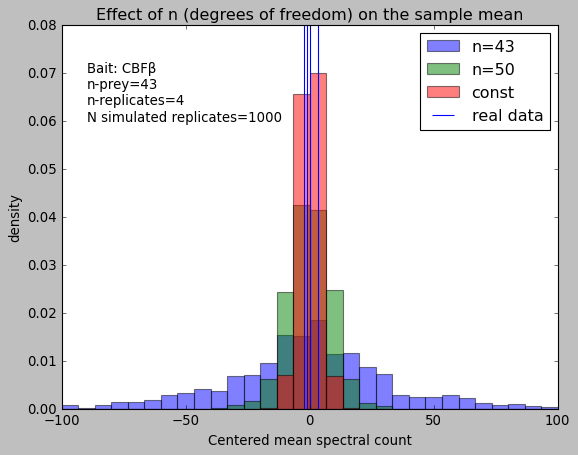

In [35]:
def plot_wishart_dof_effect(x1,
                            x2,
                            x_const,
    nbins=30, 
                            xmin=-100, 
                            xmax=100, 
                            density=True,
                            alpha=0.5, 
                            style='classic', 
                            label1='n=43',
                            label2='n=50', 
                            ylabel='density', 
                            xlabel='Centered mean spectral count',
                            title='Effect of n (degrees of freedom) on the sample mean',
                            real_label = 'real data',
                            ymin=0, 
                            ymax = 0.08,
                            textstr=u'Bait: CBF\u03B2\nn-prey=43\nn-replicates=4\nN simulated replicates=1000',
                            textx=-90,
                            texty=0.06,
                            vlines_operator=np.mean):
  
    hist = partial(plt.hist, bins=nbins, range=(xmin, xmax), density=density, alpha=alpha)

    plt.style.use(style)

    hist(x1, label=label1)
    hist(x2, label=label2)
    hist(x_const, label='const')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)

    plt.vlines(vlines_operator(mover_training.centered_Y, axis=0), label=real_label, ymin=ymin, ymax=ymax)
    plt.text(textx, texty, textstr)
    plt.legend()
    plt.show()
    
plot_wishart_dof_effect(m43, m50, mover_training.mean_sim)

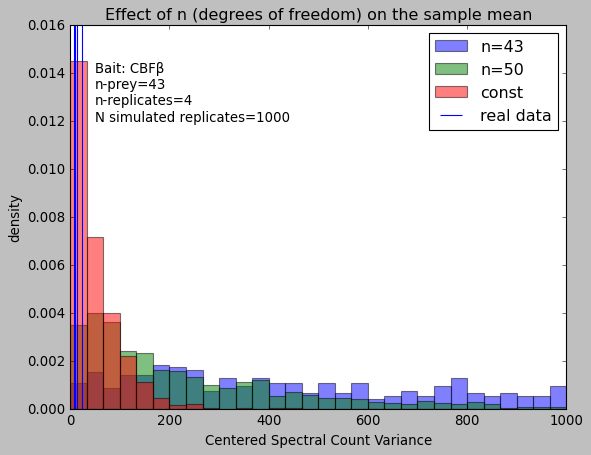

In [44]:
plot_wishart_dof_effect(v43, v50,
                        x_const=mover_training.var_sim,
                        nbins=30,
                        xmin=0,
                        xmax=1000,
                        xlabel="Centered Spectral Count Variance",
                        density=True, alpha=0.5,
                        textx=50, texty=0.012,
                        ymin=0, ymax=0.016,
                        vlines_operator=np.var)

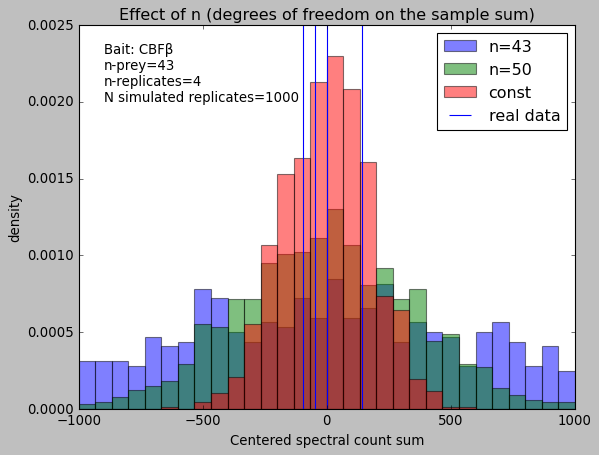

In [51]:
plot_wishart_dof_effect(ss43, ss50, mover_training.sum_sim, 
                       vlines_operator=np.sum, nbins=30, 
                       xmin=-1000, xmax=1000,
                       textx=-900, texty=0.002,
                       ymin=0, ymax=0.0025,
                       title="Effect of n (degrees of freedom on the sample sum)",
                       xlabel="Centered spectral count sum")

In [55]:
# construct the proposal distribution

move_model = partial(move_model, edge_prob=0.5, move_n_edges=10, n_prey=43, wish_dof=50)
#move_model = jax.jit(move_model)


jit_move = jax.jit(move_model)

jit_step = jax.jit(_mh_step__j)

D = get_D(cb_train)
log_score_fun = partial(log_score, D=D)
            
kernel = partial(mh_step, log_prob_fun = log_score_fun,
                proposal=move_model)


n_accepted, scores = mh_algorithim(rseed=13,
                                   M=M, 
                                   kernel=kernel)

AssertionError: (11, 10)

In [57]:
log_score_fun = partial(log_score, D=D)
mh_step(key, log_score_fun, move_model, M)

TypeError: Argument 'functools.partial(<function log_score at 0x7fe3a3311940>, D={'ds': array([[22, 22, 26, 34],
       [ 9, 11, 12, 16],
       [ 8,  8, 26, 27],
       [78, 77, 66, 99],
       [24, 19, 15, 11],
       [23, 23, 24, 33],
       [17, 19, 18, 21],
       [42, 46, 29, 48],
       [ 5, 10,  8, 14],
       [ 7, 12, 11, 10],
       [70, 75, 77, 85],
       [33, 37, 44, 68],
       [ 5,  8,  3,  2],
       [ 1,  6,  7,  9],
       [ 3,  5,  7,  6],
       [ 0,  2, 10,  8],
       [ 1,  2,  3,  5],
       [ 2,  4,  6, 11],
       [ 2,  4,  2,  7],
       [ 1,  2,  2,  3],
       [ 3,  3,  3,  5],
       [ 5,  6,  6,  9],
       [ 4,  4,  5,  4],
       [ 7, 11, 18, 20],
       [ 1,  0,  5,  5],
       [ 0,  0,  4,  5],
       [ 0,  0,  3,  5],
       [ 3,  3, 11, 10],
       [ 2,  4,  3,  2],
       [ 1,  4,  3,  1],
       [ 1,  3,  0,  3],
       [ 0,  0,  3,  3],
       [ 6,  6,  1,  1],
       [ 0,  1,  3,  5],
       [ 0,  0,  2,  4],
       [ 0,  0,  6,  6],
       [ 0,  2,  2,  1],
       [ 0,  0,  3,  3],
       [ 3,  2,  1,  1],
       [ 0,  0,  4,  6],
       [ 0,  2,  3,  2],
       [ 3,  2,  3,  8],
       [ 1,  0,  4,  6]], dtype=int8)})' of type <class 'functools.partial'> is not a valid JAX type.

In [56]:
_, a, b = log_score_fun(M=M)

AssertionError: (11, 10)

In [58]:
sum(a) + sum(b)

NameError: name 'a' is not defined

In [59]:
log_score_fun(M=M)

AssertionError: (11, 10)

In [ ]:
jax.random.randint(key, shape=(43,), minval=0, maxval=43)

In [60]:
nsamples = 30
key = jax.random.PRNGKey(13)
keys = jax.random.split(key, nsamples + 1)
precision = pynet_rng.wishart(keys[0], jnp.eye(43), p=43, n=43)
for i in range(nsamples):
    precision = pynet_rng.wishart(keys[i + 1], precision, p=43, n=43)
    

In [61]:
Y = D['ds']
mean = np.mean(Y, axis = 1).reshape((43, 1))
centered = Y - mean
S = Y @ Y.T
C = centered @ centered.T

18.783126014061654 4152.802614132849


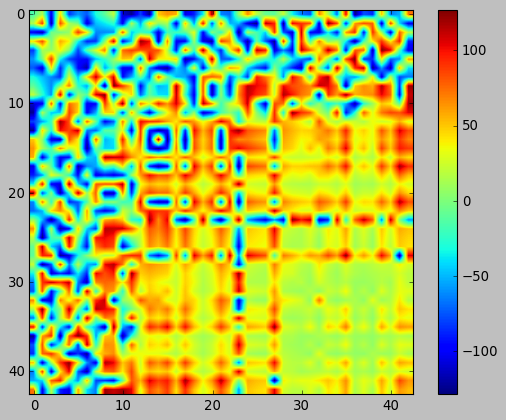

In [62]:
plt.imshow(S)
plt.colorbar()
print(np.mean(S), np.var(S))

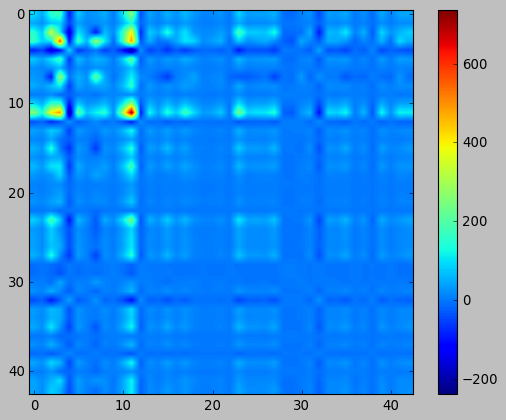

In [63]:
plt.imshow(C)
plt.colorbar()

In [65]:
M['Sigma_inv_s']

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [66]:
# plot a move of edges moving
A = M['As']
kernal = partial(mp._move_edges_j, n_edges = 11, n=len(A))
kernal = jax.jit(kernal)

n_frames = 100
key = jax.random.PRNGKey(13)
keys = jax.random.split(key, n_frames)
a = A

def create_frame(t, a):
    fig = plt.figure()
    a = kernal(keys[t], a, prob=0.5)
    a = np.array(a)
    
    plt.imshow(a)
    plt.title('Random Edge Sampling')
    plt.xlabel('j')
    plt.ylabel('i')
    plt.savefig(f'./img/03_log_composite_connectivity_prior__adjacency_example_{t}.png')
    plt.close()
    return a
    
for t in range(n_frames):
    a = create_frame(t, a)
    
frames = []
for t in range(n_frames):
    image = imageio.v2.imread(f'./img/03_log_composite_connectivity_prior__adjacency_example_{t}.png')
    frames.append(image)

# combine frames into a gif

TypeError: _move_edges_j() got an unexpected keyword argument 'n'

<Figure size 640x480 with 0 Axes>

In [ ]:
import imageio
imageio.mimsave('./gif/03_log_composite_connectivity_prior__adjacency_example.gif', frames, fps=5)

![SegmentLocal](./gif/03_log_composite_connectivity_prior__adjacency_example.gif "segment")

In [67]:
a = create_frame(0, a)

TypeError: _move_edges_j() got an unexpected keyword argument 'n'

<Figure size 640x480 with 0 Axes>

In [ ]:
# Example GIF
import imageio
from IPython.display import Image
Image(filename="./img/img_0.png")
x = [1, 2, 3, 4, 4, 4, 4, 3, 2, 1, 1, 1, 1]
y = [1, 1, 1, 1, 2, 3, 4, 4, 4, 4, 3, 2, 1]
time = list(range(13))
def create_frame(t):
    fig = plt.figure(figsize=(6, 6))    
    plt.plot(x[:(t+1)], y[:(t+1)], color = 'grey' )
    plt.plot(x[t], y[t], color = 'black', marker = 'o' )    
    plt.xlim([0,5])
    plt.xlabel('x', fontsize = 14)
    plt.ylim([0,5])
    plt.ylabel('y', fontsize = 14)
    plt.title(f'Relationship between x and y at step {t}',
              fontsize=14)    
    plt.savefig(f'./img/img_{t}.png', 
                transparent = False,  
                facecolor = 'white'
               )    
    plt.close()


create_frame(0)

# create a bunch of frames
for t in time:
    create_frame(t)

frames = []
for t in time:
    image = imageio.v2.imread(f"./img/img_{t}.png")
    frames.append(image)

# combine frames into a gif

imageio.mimsave('./gif/example.gif', frames, fps=5)

![SegmentLocal](./gif/example.gif "segment")

In [68]:
plt.show('./img/img_0.png')

In [ ]:
# Plotting code

import itertools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.rcParams['animation.ffmpeg_path'] = '/home/aji/anaconda3/envs/pynetp3.10.0/bin/ffmpeg'


fig, ax = plt.subplots()
im = ax.imshow(A)

n_frames = 100
key = jax.random.PRNGKey(13)
keys = jax.random.split(key, n_frames)
def init():
    return im

def func(frame):
    
    index = int(frame)
    a = kernal(keys[index], a, prob=0.5)
    a = np.array(a)
    im.set_data(a)
    return im

ani = animation.FuncAnimation(fig, func, data_gen, interval=n_frames, init_func=init,
                              save_count=100)

video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [ ]:
mp._move_edges_j(key, A, prob=0.5, n_edges=2, n=10)

In [ ]:
def init():
    A = np.array(A)
    im = ax.imshow(A)
    return im
    
def func(A):
    A = np.array(A)
    im = ax.imshow(A)
    return im

#for frame in range(n_frames):
    #a = kernal(keys[frame], a, prob=0.5)
    

ani = animation.FuncAnimation(fig, func, data_gen, interval=100, init_func=init,
                              save_count=100)
video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [ ]:
?ax.imshow


In [ ]:


def data_gen():
    for cnt in itertools.count():
        t = cnt / 10
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 1)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

# Only save last 100 frames, but run forever
ani = animation.FuncAnimation(fig, run, data_gen, interval=100, init_func=init,
                              save_count=1000)

video = ani.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [ ]:
?animation.FuncAnimation

In [ ]:
plt.show(ani)

In [ ]:
%%bash
which ffmpeg

In [ ]:
loc = 0.6
scale = 0.08
x = np.arange(-1 + loc, 1.1 + loc, 0.1)
plt.plot(x, sp.stats.norm.logpdf(x, loc=loc, scale=scale))

In [ ]:
Ak = np.tril(A, k=-1)
U = np.triu(np.ones((44, 44)))
Ak = Ak + U

In [ ]:
plt.imshow(Ak)

In [ ]:
i_s, j_s = np.where(Ak == 0)

In [ ]:
A[i_s, j_s]

In [ ]:
cb.data.loc[:, ["r1", "r2", "r3", "r4"]].values

In [ ]:
mp.d(np.zeros((44, 44), dtype=int), np.arange(44))

In [ ]:
lambdas = [0.1, 1, 10]
def gen_data(lambda_s, density=False):
    ys = []
    xs = []
    for i in range(1, len(A)+1):
        Cs = np.arange(i)

        n_dis = m.d(A, Cs)
        score = m.log_pdf_As__Cs_lambda_s(A, Cs, lambda_s)
        ys.append(score)
        xs.append(n_dis)
    if density:
        xs = xs
        ys = np.exp(ys)
    return xs, ys
        
density = True
xs, ys = gen_data(0.1, density=density)
xs_1, ys_1 = gen_data(1, density=density)
xs_10, ys_10 = gen_data(2, density=density)


In [ ]:
def plot_composite_connectivity():
    plt.title("Composite connectivity restraint")
    plt.style.use('ggplot')
    plt.plot(xs, ys, 'g.', label=u'\u03BB 0.1')
    plt.plot(xs_1, ys_1, 'r.', label=u'\u03BB 1')
    plt.plot(xs_10, ys_10, 'b.', label=u'\u03BB 10')
    plt.xlabel('Disconnected prey')
    plt.ylabel('P(As | Cs, lambda_s)')
    plt.legend()

In [ ]:
def a(x):
    return x + 1

def b(x):
    return x + x

c = jax.jit(a)
d = jax.jit(lambda x: a(b(x)))
e = jax.jit(lambda x: c(b(x)))

In [ ]:
jax.make_jaxpr(d)(2)

In [ ]:
# Conclusion - jitting an inner function and then 
jax.make_jaxpr(e)(2)

##### plt.title("Composite connectivity log density")
plt.style.use('ggplot')
plt.plot(xs, np.log(ys), 'g-', label=u'\u03BB 0.1')
plt.plot(xs_1, np.log(ys_1), 'r-', label=u'\u03BB 1')
plt.plot(xs_10, np.log(ys_10), 'b-', label=u'\u03BB 10')
plt.xlabel('Disconnected prey')
plt.ylabel('log P(As | Cs, lambda_s)')
plt.legend()